In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm, t
import pandas as pd
import numpy as np
import os


In [7]:
prost_cancer_df = pd.read_csv(os.path.join('data', 'prostate_cancer.csv'))
prost_cancer_df

resp_names = ['lpsa']
var_names  = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']


In [10]:
prost_cancer_df[resp_names+var_names]

,lpsa,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.430783,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.162519,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.162519,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-0.162519,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.371564,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...,...
92,4.385147,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
93,4.684443,3.821004,3.896909,44,-1.386294,1,2.169054,7,40
94,5.143124,2.907447,3.396185,52,-1.386294,1,2.463853,7,10
95,5.477509,2.882564,3.773910,68,1.558145,1,1.558145,7,80


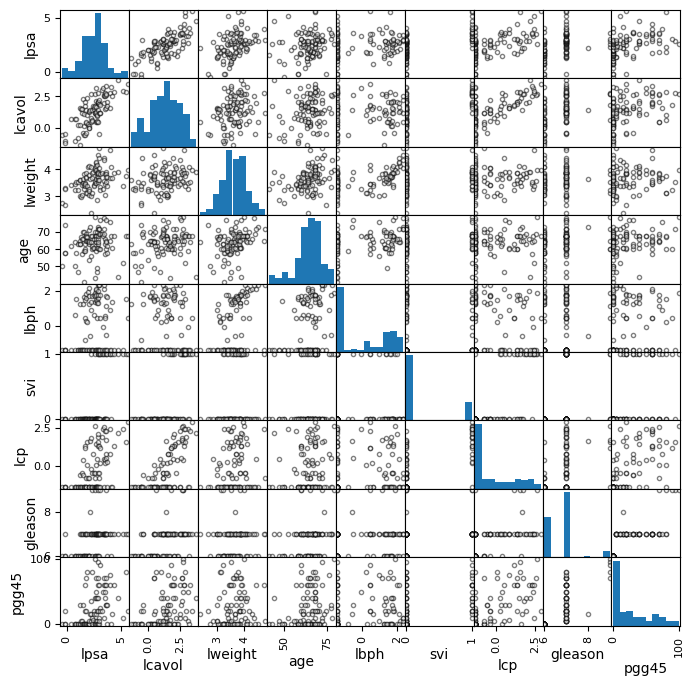

In [19]:
pd.plotting.scatter_matrix(prost_cancer_df[resp_names+var_names],
                            figsize    = (8, 8),
                            facecolors = "w",
                            edgecolors = "k")
plt.savefig(os.path.join('figures', 'cancer_scatter_matrix.png'),
                    dpi=300, transparent=True, bbox_inches = 'tight')



In [32]:
train_indexes = np.where(prost_cancer_df=="T")

train_df = prost_cancer_df[prost_cancer_df.train=="T"]
test_df  = prost_cancer_df[prost_cancer_df.train=="F"]

y_train = train_df[resp_names].values
X_train = train_df[var_names].values

y_test = test_df[resp_names].values
X_test = test_df[var_names].values

In [36]:
def residual_sum_of_squares(y, y_hat):
    return np.sum((y - y_hat)**2)

def linear_regression(X_train, y_train, X_test, y_test):
    X    = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    beta = np.linalg.pinv(X.T @ X) @ X.T @ y_train

    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    y_hat       = X @ beta
    y_hat_test  = X_test @ beta

    return residual_sum_of_squares(y_hat_test, y_test)



15.63822016522931

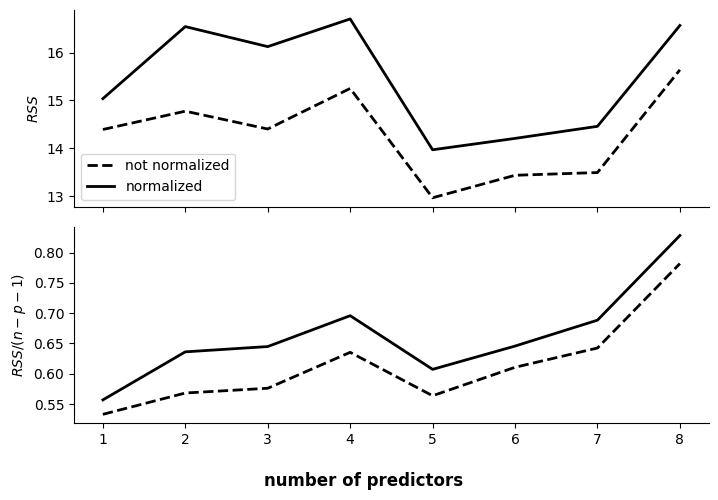

In [76]:

def normalize_data(x):
    x = x - np.mean(x, axis=0)
    x = x / np.std(x, axis=0)
    return x

number_of_predictors = 8
rss_raw_all      = np.full(number_of_predictors, np.nan)

rss_all      = np.full(number_of_predictors, np.nan)
norm_rss     = np.full(number_of_predictors, np.nan)
norm_raw_rss = np.full(number_of_predictors, np.nan)

for i in range(1,number_of_predictors+1):
    x_train = normalize_data(X_train[:, :i])
    x_test  = normalize_data(X_test[:, :i])

    rss_raw = linear_regression(X_train[:, :i], y_train, X_test[:, :i], y_test)
    rss     = linear_regression(x_train, y_train, x_test, y_test)

    n = len(y_test)
    p = i+1

    rss_all[i-1]      = rss
    rss_raw_all[i-1]  = rss_raw
    norm_rss[i-1] = rss / (n-p-1)
    norm_raw_rss[i-1] = rss_raw / (n-p-1)

fig, ax = plt.subplots(2, 1, figsize=(7.2, 5), sharex=True)
ax[0].plot(range(1, number_of_predictors+1), rss_raw_all, label="not normalized", color="k", ls="--", lw=2)
ax[0].plot(range(1, number_of_predictors+1), rss_all, label="normalized", color="k", lw=2)

ax[1].plot(range(1, number_of_predictors+1), norm_raw_rss, label="RSS", color="k", ls="--", lw=2)
ax[1].plot(range(1, number_of_predictors+1), norm_rss, label="RSS", color="k", lw=2)

fig.supxlabel("number of predictors", weight="bold")

ax[1].set_ylabel(r"$RSS/(n-p-1)$", weight="bold")
ax[0].set_ylabel(r"$RSS$", weight="bold")
ax[0].legend()

for axi in ax.flatten():
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

plt.tight_layout()

fig.savefig(os.path.join('figures', 'cancer_rss.png'))

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_59375/2228301353.py:3: RuntimeWarning: invalid value encountered in divide
  x = x / np.std(x, axis=0)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_59375/2228301353.py:3: RuntimeWarning: divide by zero encountered in divide
  x = x / np.std(x, axis=0)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_59375/3494818312.py:6: RuntimeWarning: invalid value encountered in matmul
  beta = np.linalg.pinv(X.T @ X) @ X.T @ y_train


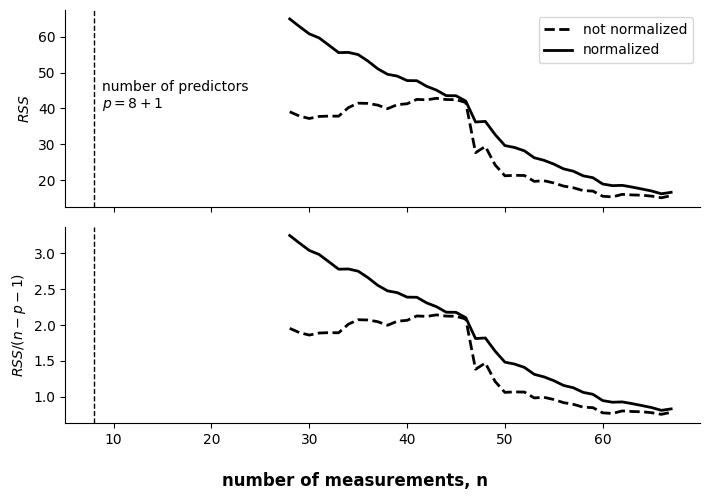

In [101]:
number_of_meas   = len(X_train)
rss_raw_all      = np.full(number_of_meas, np.nan)

rss_all      = np.full(number_of_meas, np.nan)
norm_rss     = np.full(number_of_meas, np.nan)
norm_raw_rss = np.full(number_of_meas, np.nan)

for i in range(2, number_of_meas+1):
    try:
        x_train = normalize_data(X_train[:i, :])
        x_test  = normalize_data(X_test[:, :])

        rss_raw = linear_regression(X_train[:i, :], y_train[:i], X_test[:, :], y_test)
        rss     = linear_regression(x_train, y_train[:i], x_test, y_test)

        n = len(y_test)
        p = x_train.shape[1]+1

        rss_all[i-1]      = rss
        rss_raw_all[i-1]  = rss_raw
        norm_rss[i-1]     = rss / (n-p-1)
        norm_raw_rss[i-1] = rss_raw / (n-p-1)
    except:
        n = len(y_test)
        p = i+1

        rss_all[i-1]      = np.nan
        rss_raw_all[i-1]  = np.nan
        norm_rss[i-1]     = np.nan
        norm_raw_rss[i-1] = np.nan

fig, ax = plt.subplots(2, 1, figsize=(7.2, 5), sharex=True)
ax[0].plot(range(1, number_of_meas+1), rss_raw_all, label="not normalized", color="k", ls="--", lw=2)
ax[0].plot(range(1, number_of_meas+1), rss_all, label="normalized", color="k", lw=2)

ax[1].plot(range(1, number_of_meas+1), norm_raw_rss, label="RSS", color="k", ls="--", lw=2)
ax[1].plot(range(1, number_of_meas+1), norm_rss, label="RSS", color="k", lw=2)

fig.supxlabel("number of measurements, n", weight="bold")

ax[1].set_ylabel(r"$RSS/(n-p-1)$", weight="bold")
ax[0].set_ylabel(r"$RSS$", weight="bold")
ax[0].legend()

ax[0].axvline(8, lw=1, ls="--", color="k")
ax[1].axvline(8, lw=1, ls="--", color="k")

ax[0].text(8.8, 40, "number of predictors\n"+r"$p=8+1$", )

for axi in ax.flatten():
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

plt.tight_layout()

fig.savefig(os.path.join('figures', 'cancer_rss_n.png'))

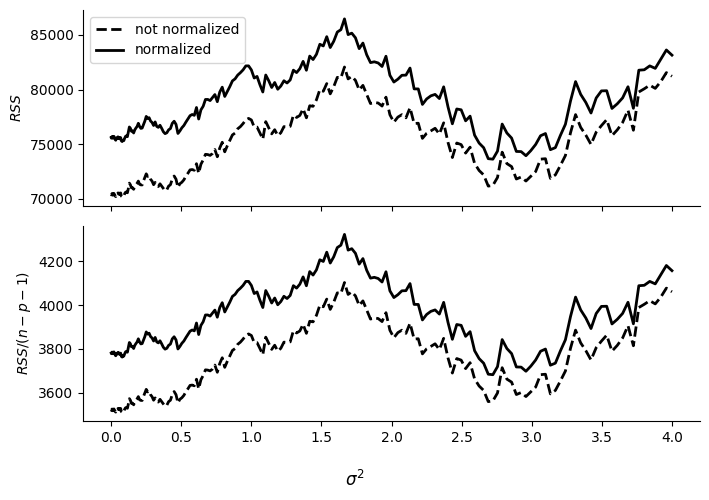

In [114]:
std_range = np.arange(0, 2+0.01, 0.01)

number_of_std   = len(std_range)
rss_raw_all      = np.full(number_of_std, np.nan)

rss_all      = np.full(number_of_std, np.nan)
norm_rss     = np.full(number_of_std, np.nan)
norm_raw_rss = np.full(number_of_std, np.nan)

for i, std in enumerate(std_range):

    x_train = normalize_data(X_train)
    x_test  = normalize_data(X_test)

    y_train = y_train + std*np.random.normal(0, 1, y_train.shape)
    y_test  = y_test  + std*np.random.normal(0, 1, y_test.shape)

    rss_raw = linear_regression(X_train, y_train, X_test, y_test)
    rss     = linear_regression(x_train, y_train, x_test, y_test)

    n = len(y_test)
    p = x_train.shape[1]+1

    rss_all[i]      = rss
    rss_raw_all[i]  = rss_raw
    norm_rss[i]     = rss / (n-p-1)
    norm_raw_rss[i] = rss_raw / (n-p-1)


fig, ax = plt.subplots(2, 1, figsize=(7.2, 5), sharex=True)
ax[0].plot(std_range**2, rss_raw_all, label="not normalized", color="k", ls="--", lw=2)
ax[0].plot(std_range**2, rss_all, label="normalized", color="k", lw=2)

ax[1].plot(std_range**2, norm_raw_rss, label="RSS", color="k", ls="--", lw=2)
ax[1].plot(std_range**2, norm_rss, label="RSS", color="k", lw=2)

fig.supxlabel(r"$\sigma^2$", weight="bold")

ax[1].set_ylabel(r"$RSS/(n-p-1)$", weight="bold")
ax[0].set_ylabel(r"$RSS$", weight="bold")
ax[0].legend()

#ax[0].axvline(8, lw=1, ls="--", color="k")
#ax[1].axvline(8, lw=1, ls="--", color="k")

#ax[0].text(8.8, 40, "number of predictors\n"+r"$p=8+1$", )

for axi in ax.flatten():
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

plt.tight_layout()

fig.savefig(os.path.join('figures', 'cancer_rss_sigma.png'))